In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/mushrooms.csv')

data.drop('stalk-shape', axis=1, inplace=True)

In [3]:
import collections

dists = collections.OrderedDict()
for c in data.columns[1:]:
    print("Column : %s" % c)
    keys = data[c].unique()
    
    d_k = collections.OrderedDict()
    for k in keys:
        d = pd.concat([data['class'], data[c]], axis=1)
        
        e = d.loc[(d['class'] == 'e') & (data[c] == k)]
        p = d.loc[(d['class'] == 'p') & (data[c] == k)]

        e_len, p_len = len(e), len(p)
        total = e_len + p_len
        
        print("[*] key %s : %d/%d (%.3f/%.3f) (total %d)" % 
              (k, e_len, p_len, (e_len/total), (p_len/total), total))
        d_k.update({k: [e_len, p_len]})
    dists[c] = d_k

Column : cap-shape
[*] key x : 1948/1708 (0.533/0.467) (total 3656)
[*] key b : 404/48 (0.894/0.106) (total 452)
[*] key s : 32/0 (1.000/0.000) (total 32)
[*] key f : 1596/1556 (0.506/0.494) (total 3152)
[*] key k : 228/600 (0.275/0.725) (total 828)
[*] key c : 0/4 (0.000/1.000) (total 4)
Column : cap-surface
[*] key s : 1144/1412 (0.448/0.552) (total 2556)
[*] key y : 1504/1740 (0.464/0.536) (total 3244)
[*] key f : 1560/760 (0.672/0.328) (total 2320)
[*] key g : 0/4 (0.000/1.000) (total 4)
Column : cap-color
[*] key n : 1264/1020 (0.553/0.447) (total 2284)
[*] key y : 400/672 (0.373/0.627) (total 1072)
[*] key w : 720/320 (0.692/0.308) (total 1040)
[*] key g : 1032/808 (0.561/0.439) (total 1840)
[*] key e : 624/876 (0.416/0.584) (total 1500)
[*] key p : 56/88 (0.389/0.611) (total 144)
[*] key b : 48/120 (0.286/0.714) (total 168)
[*] key u : 16/0 (1.000/0.000) (total 16)
[*] key c : 32/12 (0.727/0.273) (total 44)
[*] key r : 16/0 (1.000/0.000) (total 16)
Column : bruises
[*] key t : 2

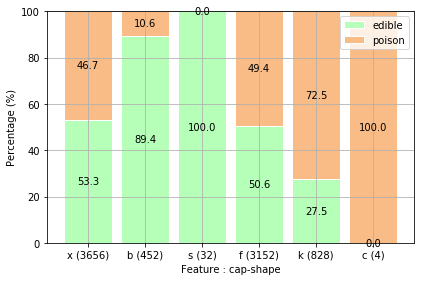

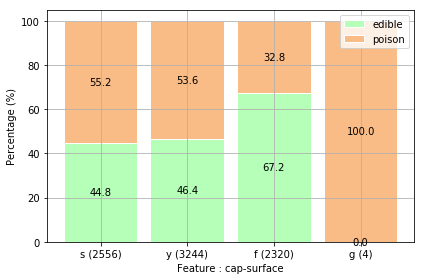

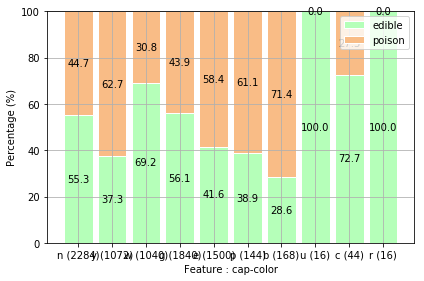

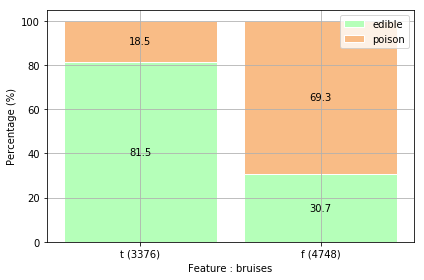

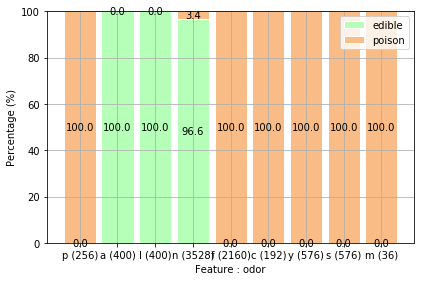

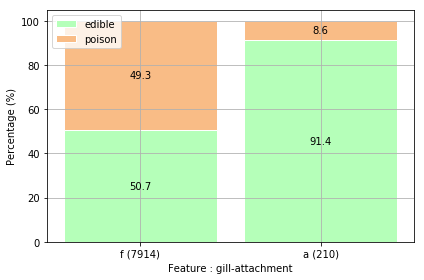

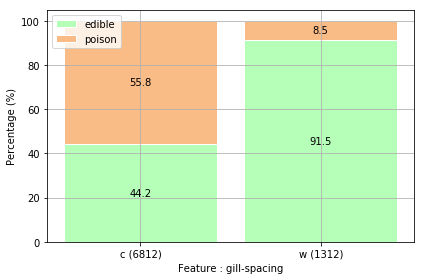

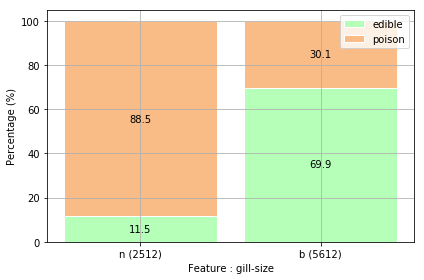

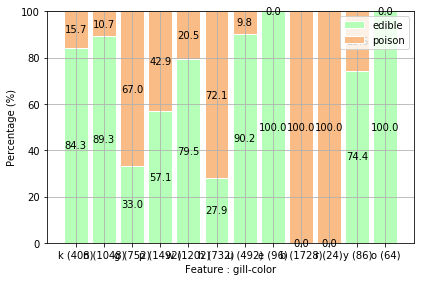

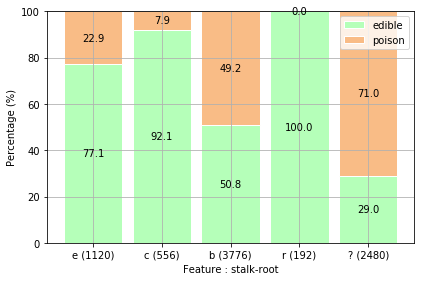

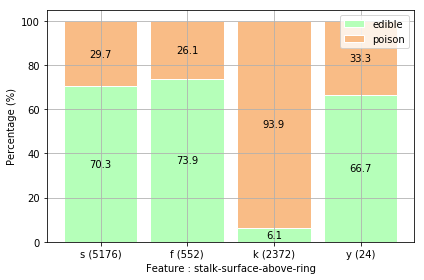

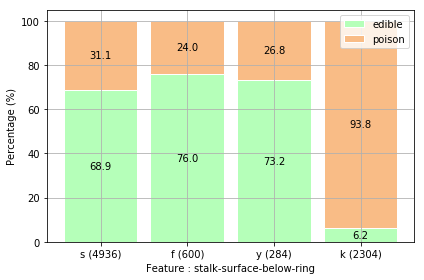

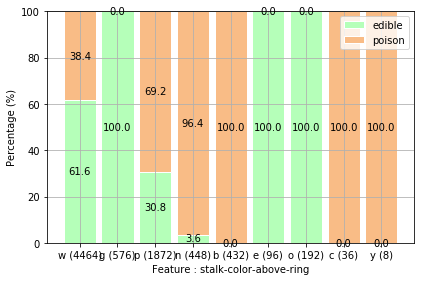

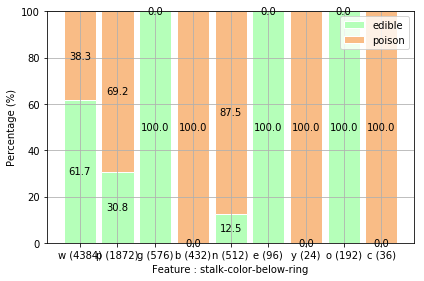

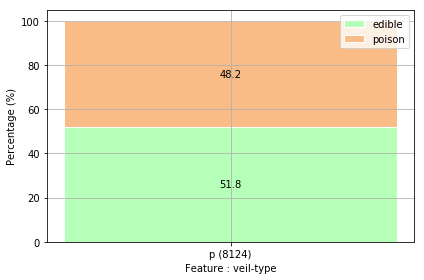

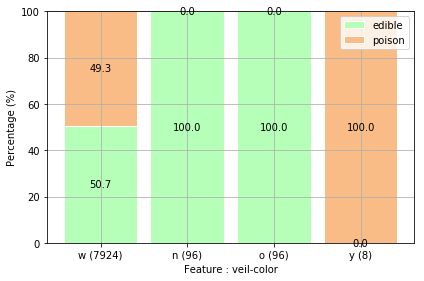

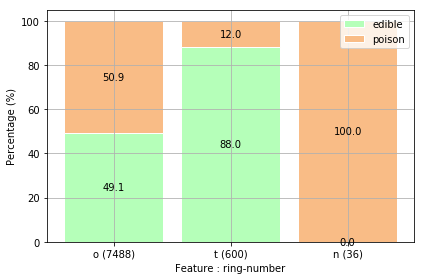

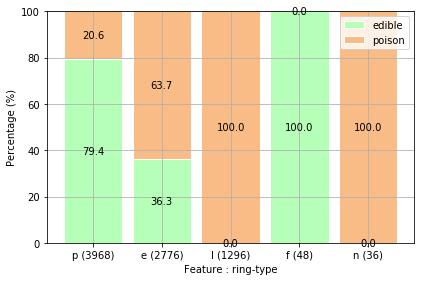

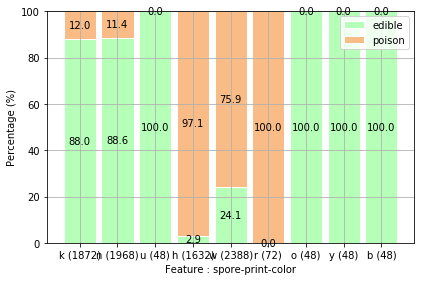

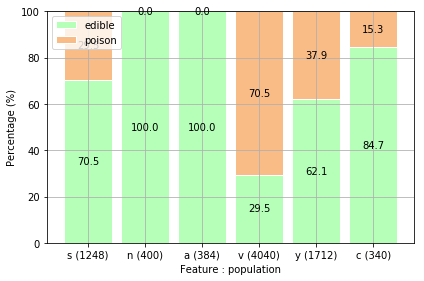

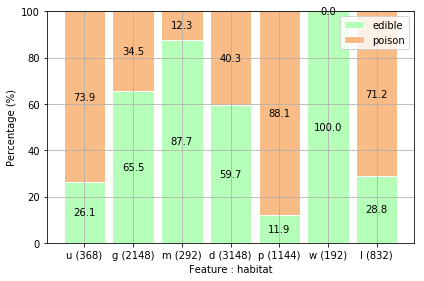

In [4]:
import os


if not os.path.exists('./stack_bar/'):
    os.mkdir("./stack_bar/")

def stack_bar(d, name="", title=""):
    e_data = [100. * x / (x + y) for x, y in d.values()]
    p_data = [100. * y / (x + y) for x, y in d.values()]

    e_bar = plt.bar(d.keys(), e_data, label='edible', color='#b5ffb9', edgecolor='white', width=.85)
    p_bar = plt.bar(d.keys(), p_data, label='poison', bottom=e_data, color='#f9bc86', edgecolor='white', width=.85)
    bars = [e_bar, p_bar]
    
    for axis in bars:
        for bar in axis:
            w, h = bar.get_width(), bar.get_height()
            plt.text(bar.get_x() + w / 2, bar.get_y() + h / 2, 
                     "{:.1f}".format(h),
                     ha="center", va="center")
    
    plt.title(title)
    xtick_name = [ "%s (%d)" % (k, x + y) for k, [x, y] in d.items()]
    plt.xticks(np.arange(len(xtick_name)), xtick_name)
    plt.xlabel("Feature : %s" % name)
    plt.ylabel("Percentage (%)")
        
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    plt.savefig('./stack_bar/%s.png' % name)
    plt.show()


for k, v in dists.items():
    stack_bar(v, k)